In [36]:
# Data collected over a period of 12 hours
# Dig on DNS address 1.1.1.1 on 3 popular search engines and 2 privacy-focused ones
# Google, Yahoo, Bing & StartPage, DuckDuckGo

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import csv

In [35]:
# The file processing function
#'/Users/XG/Desktop/Python_DNSAssign/dig__.txt'
def processFile(fileLoc):
    
    with open(fileLoc) as f:
        processed_vec = []
        for line in f:
            if line.startswith(";; flags: qr ra;"):
                processed_vec.append(line[2:])    
        #df = pd.DataFrame(processed_vec)     

    indices = []
    for i, elem in enumerate(processed_vec):
        if 'ANSWER: 0' in elem:
            indices.append(i)
    #print(indices)

    bing_vec = []
    
    ctr = 0
    for i in range(len(indices) - 1):
        if indices[i+1] == indices[i] + 1:
            ctr = ctr + 1
        else:
            bing_vec.append(ctr)
            ctr = 0

    bing_vec = list(filter((0).__ne__, bing_vec))

    return bing_vec
    print(bing_vec)
    #print(indices)
    

In [40]:
google_out = processFile('/Users/XG/Desktop/Python_DNSAssign/digGoogle.txt')
duck_out = processFile('/Users/XG/Desktop/Python_DNSAssign/digDuck.txt')
bing_out = processFile('/Users/XG/Desktop/Python_DNSAssign/digBing.txt')
startPage_out = processFile('/Users/XG/Desktop/Python_DNSAssign/digStartpage.txt')
yahoo_out = processFile('/Users/XG/Desktop/Python_DNSAssign/digYahoo.txt')

In [59]:
import itertools
#rows = list(zip(google_out,duck_out,bing_out,startPage_out,yahoo_out))

rows = [google_out, duck_out, bing_out, startPage_out, yahoo_out]
#print(rows)

rows = [list(tup) for tup in itertools.zip_longest(*rows, fillvalue="")]

with open('/Users/XG/Desktop/Python_DNSAssign/output.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
        


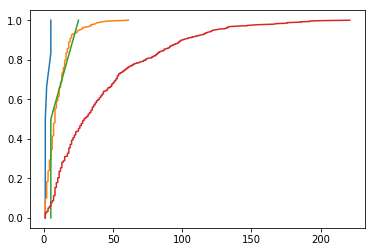

In [61]:
# with reference to https://stackoverflow.com/questions/40470120/how-to-plot-several-cumulative-distribution-functions-from-data-in-a-csv-file-in
data_req = pd.read_table('/Users/XG/Desktop/Python_DNSAssign/output.csv', sep=",")

arr = data_req.values 
arr.sort(axis=0) 
data_req = pd.DataFrame(arr, index=data_req.index, columns=data_req.columns)
sorted_values = data_req

for col in sorted_values.columns: 
    y = np.linspace(0.,1., len(sorted_values[col].dropna()))
    plt.plot(sorted_values[col].dropna(), y)